In [ ]:
from google.cloud import bigquery
from google.colab import auth


auth.authenticate_user()

In [ ]:
import pandas as pd
query = '''
  SELECT *
  FROM `wagon-bootcamp-396316.londonbss.processed_all_2`
'''
df = pd.read_gbq(query, project_id="wagon-bootcamp-396316")
df

,__StartDate,__StartStationName,__EndStationName,__Nooftrips
0,2022-09-12 10:00:00,"Green Street, Mayfair","Hyde Park Corner, Hyde Park",4
1,2022-09-12 14:00:00,"Park Road (Baker Street), The Regent's Park","All Saints' Road, Portobello",4
2,2022-09-12 14:00:00,"Serpentine Car Park, Hyde Park","Palace Gate, Kensington Gardens",4
3,2022-09-12 17:00:00,"Hampstead Road, Euston","Hampstead Road, Euston",4
4,2022-09-12 18:00:00,"Aquatic Centre, Queen Elizabeth Olympic Park","Aquatic Centre, Queen Elizabeth Olympic Park",8
...,...,...,...,...
5743474,2023-06-12 17:00:00,"Wormwood Street, Liverpool Street","Waterloo Station 3, Waterloo",3
5743475,2023-06-13 17:00:00,"Braham Street, Aldgate","Waterloo Station 3, Waterloo",3
5743476,2023-06-14 17:00:00,"The Guildhall, Guildhall","Waterloo Station 3, Waterloo",3
5743477,2023-06-14 17:00:00,"Wormwood Street, Liverpool Street","Waterloo Station 3, Waterloo",3


In [ ]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import io
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.columns

Index(['__StartDate', '__StartStationName', '__EndStationName', '__Nooftrips'], dtype='object')

In [ ]:
df=df.rename({'__StartDate':'StartDate',"__StartStationName":"StartStationName","__EndStationName":'EndStationName','__Nooftrips':'Nooftrips'},axis=1)

In [ ]:
df

,StartDate,StartStationName,EndStationName,Nooftrips
0,2022-09-12 10:00:00,"Green Street, Mayfair","Hyde Park Corner, Hyde Park",4
1,2022-09-12 14:00:00,"Park Road (Baker Street), The Regent's Park","All Saints' Road, Portobello",4
2,2022-09-12 14:00:00,"Serpentine Car Park, Hyde Park","Palace Gate, Kensington Gardens",4
3,2022-09-12 17:00:00,"Hampstead Road, Euston","Hampstead Road, Euston",4
4,2022-09-12 18:00:00,"Aquatic Centre, Queen Elizabeth Olympic Park","Aquatic Centre, Queen Elizabeth Olympic Park",8
...,...,...,...,...
5743474,2023-06-12 17:00:00,"Wormwood Street, Liverpool Street","Waterloo Station 3, Waterloo",3
5743475,2023-06-13 17:00:00,"Braham Street, Aldgate","Waterloo Station 3, Waterloo",3
5743476,2023-06-14 17:00:00,"The Guildhall, Guildhall","Waterloo Station 3, Waterloo",3
5743477,2023-06-14 17:00:00,"Wormwood Street, Liverpool Street","Waterloo Station 3, Waterloo",3


In [ ]:
df=df.sort_values(by=['StartDate']).reset_index()


In [ ]:
total_stations = pd.concat([df['StartStationName'],df['EndStationName']])
total_uniq_stations = np.unique(total_stations).tolist()
len(total_uniq_stations)

813

In [ ]:
total_hours = np.unique(df['StartDate']).tolist()
len(total_hours)

6700

In [ ]:
i = len(total_uniq_stations)
k = len(total_hours)
trips_3darray = np.zeros((i,i,k))

In [ ]:
df.index[-1]

5743478

In [ ]:
total_uniq_stations.index('Abbey Orchard Street, Westminster')

0

In [ ]:
df

,index,StartDate,StartStationName,EndStationName,Nooftrips
0,1726377,2022-09-12 05:00:00,"Duke Street Hill, London Bridge","Bankside Mix, Bankside",1
1,2875390,2022-09-12 05:00:00,"St. Mark's Road, North Kensington","Westfield Southern Terrace ,Shepherd's Bush",1
2,4024311,2022-09-12 05:00:00,"William Morris Way, Sands End","Portland Place, Marylebone",1
3,2875389,2022-09-12 05:00:00,"Southwark Street, Bankside","Southwark Street, Bankside",1
4,3975955,2022-09-12 05:00:00,"Claremont Square, Angel","Claremont Square, Angel",2
...,...,...,...,...,...
5743474,2252156,2023-06-18 23:00:00,"Royal Avenue 1, Chelsea","Ontario Street, Elephant & Castle",1
5743475,2252157,2023-06-18 23:00:00,"Snowsfields, London Bridge","Crimscott Street, Bermondsey",1
5743476,2252160,2023-06-18 23:00:00,"Twig Folly Bridge, Mile End","Furze Green, Bow",1
5743477,5124495,2023-06-18 23:00:00,"Breams Buildings, Holborn","Crimscott Street, Bermondsey",1


In [ ]:
timeframe_pos = 0
ma=0
mb=0
for trip in df.index:
    so = total_uniq_stations.index(df['StartStationName'][trip])
    sd = total_uniq_stations.index(df['EndStationName'][trip])
    #print(timeframe_pos)
    trips_3darray[so][sd][timeframe_pos] += 1
    if trip < df.index[-1]:
       if df['StartDate'][trip] != df['StartDate'][trip+1]:
           timeframe_pos += 1

In [ ]:
all_trips=trips_3darray[:,:,0]

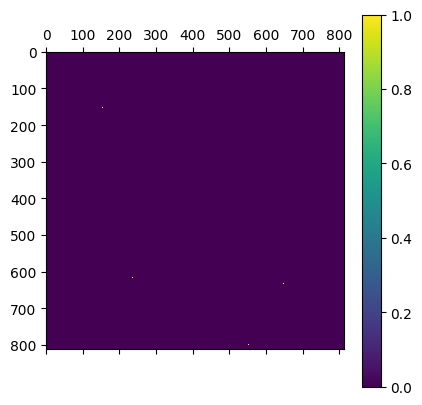

In [ ]:
plt.matshow(all_trips)
plt.colorbar()
plt.show()

In [3]:
all_trips.shape

NameError: ignored